In [1]:
from paths import *
import xml.etree.ElementTree as ET
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from C6_score import C6_score

In [2]:
dccc = pd.read_pickle(commercial_conditions_path)
dccc_chems = pd.read_pickle(chems_table_from_commercial_screens_path)

In [3]:
tree = ET.parse(autoscores_path)
root = tree.getroot()

In [4]:
hits = {}
for hit in root:
    bid = hit[0].text
    row = int(hit[1].text)
    col = int(hit[2].text)
    subwell = hit[3].text
    screen = hit[4].text
    id = bid + subwell
    hits.setdefault(screen, {}).setdefault(id, []).append((row-1)*12+col)

In [5]:
len(hits['Shotgun'])

2606

In [6]:
for k in hits:
    print(f"{k}: {sum([len(hits[k][x]) for x in hits[k]])}")

Shotgun: 44542
c3_5_Oct-08_to_Oct-18: 1384
c3_1_Oct-08_to_Oct-18: 1250
c3_2_Oct-08_to_Oct-18: 2296
c3_3_Oct-08_to_Oct-18: 3148
PACT_C3: 12486
ProPlex_C3: 4527
PS gradient: 7258
Morpheus_C3_pre_23092016: 152
JCSG+_C3: 974
c3_4_Oct-08_to_Oct-18: 1421
MemGold_C3_2018: 574
hCAII_tris_AS_180812: 5373
Lysozyme QA Screen: 56354
Memgold2_C3_2018: 382
Index_C3: 2729
c3_6_Oct-08_to_Oct-18: 1601
Morpheus_C3: 2788
c3_7_Oct-08_to_Oct-18: 547
c3_8_Oct-08_to_Oct-18: 428
KAT7_PEG-tartrate_220717: 4249
c3_2: 3791
c3_5: 4552
Cubic_C3: 168
CS_CS2_Com1_C3: 48
Anions_C3: 157
c3_3: 7898
c3_6: 2532
c3_4: 4427
c3_1: 2506
PI_PI2_C3: 469
PSS_2_Com6_C3: 12


In [7]:
def do_cohits(screen_name):
    hitcounts = np.zeros((96,96))
    for hit in hits[screen_name]:
        hitwells = hits[screen_name][hit]
        for i in hitwells:
            for j in hitwells:
                hitcounts[i-1][j-1] += 1
                hitcounts[j-1][i-1] += 1
    
    trials = len(hits[screen_name])

    cohits = np.zeros_like(hitcounts)
    for i in range(96):
        for j in range(96):
            cohits[i][j] = hitcounts[i][j] / (hitcounts[i][i] + hitcounts[j][j] - hitcounts[i][j])
            
    c6scores = np.zeros((96,96))
    print("Progress: ")
    for i in range(96):
        for j in range(i+1, 96):
            print(f"\r{i*96+j}/9216", end="")
            chems1 = dccc_chems.iloc[dccc['Design_'+screen_name][i]]
            chems2 = dccc_chems.iloc[dccc['Design_'+screen_name][j]]
            c6scores[i][j] = C6_score(chems1, chems2)

    np.save(f"generated/cohits/{screen_name}", (cohits, c6scores, hitcounts, trials))

In [8]:
found = []
notfound = []
for screen_name in hits:
    print(screen_name)
    try:
        do_cohits(screen_name)
        found.append(screen_name)
    except KeyError:
        notfound.append(screen_name)
print()
print("Found:")
print(found)
print("Not found:")
print(notfound)
np.save("generated/cohits/screennames", found)

Shotgun
Progress: 
9119/9216c3_5_Oct-08_to_Oct-18


D:\Python\Python38-32\lib\site-packages\numpy\core\_asarray.py:136: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order, subok=True)


Progress: 
1/9216c3_1_Oct-08_to_Oct-18
Progress: 
1/9216c3_2_Oct-08_to_Oct-18
Progress: 
1/9216c3_3_Oct-08_to_Oct-18
Progress: 
1/9216PACT_C3
Progress: 
9119/9216ProPlex_C3
Progress: 
9119/9216PS gradient
Progress: 
9119/9216Morpheus_C3_pre_23092016
Progress: 
1/9216JCSG+_C3
Progress: 
20/9216

<ipython-input-7-4c7016b406f8>:15: RuntimeWarning: invalid value encountered in double_scalars
  cohits[i][j] = hitcounts[i][j] / (hitcounts[i][i] + hitcounts[j][j] - hitcounts[i][j])


9119/9216c3_4_Oct-08_to_Oct-18
Progress: 
1/9216MemGold_C3_2018
Progress: 
1/9216hCAII_tris_AS_180812
Progress: 
1/9216Lysozyme QA Screen
Progress: 
9119/9216Memgold2_C3_2018
Progress: 
1/9216Index_C3
Progress: 
9119/9216c3_6_Oct-08_to_Oct-18
Progress: 
1/9216Morpheus_C3
Progress: 
9119/9216c3_7_Oct-08_to_Oct-18
Progress: 
1/9216c3_8_Oct-08_to_Oct-18
Progress: 
1/9216KAT7_PEG-tartrate_220717
Progress: 
1/9216c3_2
Progress: 
9119/9216c3_5
Progress: 
9119/9216Cubic_C3
Progress: 
1/9216CS_CS2_Com1_C3
Progress: 
1/9216Anions_C3
Progress: 
1/9216c3_3
Progress: 
9119/9216c3_6
Progress: 
9119/9216c3_4
Progress: 
9119/9216c3_1
Progress: 
9119/9216PI_PI2_C3
Progress: 
9119/9216PSS_2_Com6_C3
Progress: 
1/9216
Found:
['Shotgun', 'PACT_C3', 'ProPlex_C3', 'PS gradient', 'JCSG+_C3', 'Lysozyme QA Screen', 'Index_C3', 'Morpheus_C3', 'c3_2', 'c3_5', 'c3_3', 'c3_6', 'c3_4', 'c3_1', 'PI_PI2_C3']
Not found:
['c3_5_Oct-08_to_Oct-18', 'c3_1_Oct-08_to_Oct-18', 'c3_2_Oct-08_to_Oct-18', 'c3_3_Oct-08_to_Oct-18'

In [10]:
screens_with_cohits = ['Shotgun', 'PACT_C3', 'ProPlex_C3', 'PS gradient', 'JCSG+_C3', 'Lysozyme QA Screen', 'Index_C3', 'Morpheus_C3', 'c3_2', 'c3_5', 'c3_3', 'c3_6', 'c3_4', 'c3_1', 'PI_PI2_C3']

In [12]:
print("\\begin{tabular}{cc}")
print("\\toprule")
print("Screen & Correlation Coefficient\\\\")
print("\\midrule")
for screen in screens_with_cohits:
    cohits_normed, cohits_c6, hitcounts, trials = np.load(f"generated/cohits/{screen}.npy", allow_pickle=True)

    x = hitcounts.ravel() / trials # cohits_normed.ravel()
    y = 1-cohits_c6.ravel()
    notnanidx = ((np.isnan(x) | np.isnan(y)) == False) & (x!=0) & (x!=1) & (y!=0) & (y!=1)
    x = x[notnanidx]
    y = y[notnanidx]
    mx = np.mean(x)
    my = np.mean(y)
    r = np.sum((x-mx)*(y-my)) / np.sqrt(np.sum((x-mx)**2) * np.sum((y-my)**2))

    print(f"{screen} & {r:.3f}\\\\")
print("\\bottomrule")
print("\\end{tabular}")

\begin{tabular}{cc}
\toprule
Screen & Correlation Coefficient\\
\midrule
Shotgun & 0.291\\
PACT_C3 & 0.367\\
ProPlex_C3 & 0.172\\
PS gradient & 0.065\\
JCSG+_C3 & 0.086\\
Lysozyme QA Screen & -0.014\\
Index_C3 & 0.213\\
Morpheus_C3 & 0.183\\
c3_2 & 0.072\\
c3_5 & 0.255\\
c3_3 & 0.104\\
c3_6 & 0.089\\
c3_4 & 0.082\\
c3_1 & 0.090\\
PI_PI2_C3 & 0.069\\
\bottomrule
\end{tabular}


correlation coefficient = 0.19802965876590728


Text(0.5, 1.0, 'PSS_2_Com6_C3')

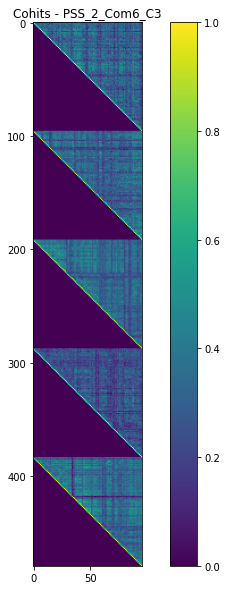

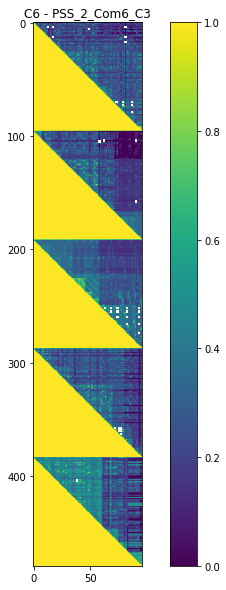

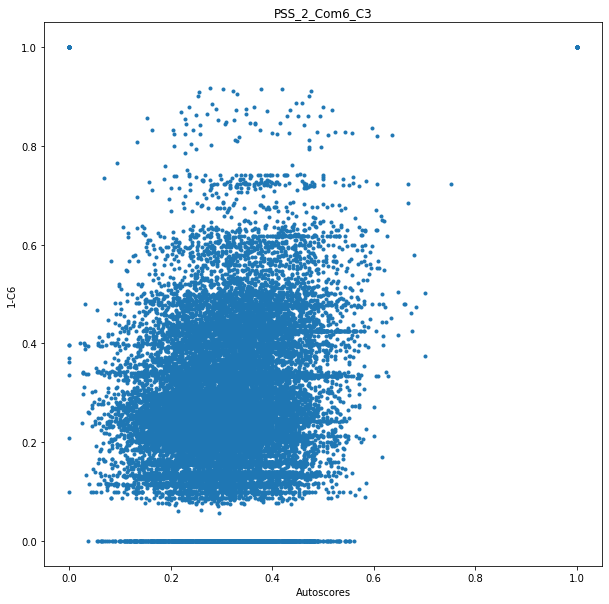

In [200]:
cohits_normed = []
cohits_c6 = []
for i in range(1, 6):
    a, b = np.load(f"generated/cohits/c3_{i}.npy", allow_pickle=True)
    cohits_normed.append(a)
    cohits_c6.append(b)
cohits_normed = np.concatenate(cohits_normed)
cohits_c6 = np.concatenate(cohits_c6)

x = cohits_normed.ravel()
y = 1-cohits_c6.ravel()
notnanidx = ((np.isnan(x) | np.isnan(y)) == False) & (x!=0) & (x!=1) & (y!=0) & (y!=1)
x = x[notnanidx]
y = y[notnanidx]
mx = np.mean(x)
my = np.mean(y)
r = np.sum((x-mx)*(y-my)) / np.sqrt(np.sum((x-mx)**2) * np.sum((y-my)**2))
print(f"correlation coefficient = {r}")

plt.figure(figsize=(10,10))
plt.imshow(cohits_normed)
plt.colorbar()
plt.title(f"Cohits - {screen_name}")

plt.figure(figsize=(10,10))
plt.imshow(1-cohits_c6)
plt.colorbar()
plt.title(f"C6 - {screen_name}")

plt.figure(figsize=(10,10))
plt.scatter(cohits_normed.ravel(), 1-cohits_c6.ravel(), marker='.')
plt.xlabel("Autoscores")
plt.ylabel("1-C6")
plt.title(screen_name)

In [8]:
cohits, c6scores = np.load(f"generated/cohits/Shotgun.npy", allow_pickle=True)

In [35]:
def idx():
    for i in range(96):
        for j in range(i+1, 96):
            yield [i,j]

In [36]:
cohits_sorted_idx = sorted(idx(), key=lambda x:cohits[x[0],x[1]], reverse=True)

In [66]:
print("\\begin{tabular}{p{6cm}p{6cm}cc}")
print("\\toprule")
print("Condition 1 & Condition 2 & Cohit probability & 1-C6 Score\\\\")
print("\\midrule")
for i in range(10):
    idxs = cohits_sorted_idx[i]
    chems1 = dccc_chems.iloc[dccc['Design_Shotgun'][idxs[0]]]
    chems2 = dccc_chems.iloc[dccc['Design_Shotgun'][idxs[1]]]

    newline = False
    for u in chems1.iterrows():
        if newline: 
            print("\\newline ", end="")
        c = u[1]
        print(f"{c['name']} {c['conc']}{'M' if c['units']=='m' else c['units']}", end="")
        if not np.isnan(c["ph"]): print(f" ph {c['ph']}", end="")
        newline = True
    print("&", end="")
    newline = False
    for u in chems2.iterrows():
        if newline: 
            print("\\newline ", end="")
        c = u[1]
        print(f"{c['name']} {c['conc']}{'M' if c['units']=='m' else c['units']}", end="")
        if not np.isnan(c["ph"]): print(f" ph {c['ph']}", end="")
        newline = True
    print("&", end="")
    print(f"${cohits[idxs[0],idxs[1]]:.3f}$ & ${1-c6scores[idxs[0],idxs[1]]:.3f}$\\\\")
print("\\bottomrule")
print("\\end{tabular}")

\begin{tabular}{p{6cm}p{6cm}cc}
\toprule
Condition 1 & Condition 2 & Cohit probability & 1-C6 Score\\
\midrule
ammonium sulfate 0.2M\newline polyethylene glycol 3350 25.0w/v\newline bis-tris chloride 0.1M ph 5.5&lithium sulfate 0.2M\newline polyethylene glycol 3350 25.0w/v\newline bis-tris chloride 0.1M ph 5.5&$0.358$ & $0.629$\\
polyethylene glycol 3350 20.0w/v\newline potassium sodium tartrate 0.2M&disodium tartrate 0.2M\newline polyethylene glycol 3350 20.0w/v&$0.356$ & $0.480$\\
ammonium chloride 0.2M\newline polyethylene glycol 3350 20.0w/v&polyethylene glycol 3350 20.0w/v\newline ammonium formate 0.2M&$0.339$ & $0.425$\\
ammonium nitrate 0.2M\newline polyethylene glycol 3350 20.0w/v&polyethylene glycol 3350 20.0w/v\newline ammonium iodide 0.2M&$0.333$ & $0.425$\\
magnesium chloride 0.2M\newline polyethylene glycol 3350 25.0w/v\newline bis-tris chloride 0.1M ph 5.5&magnesium chloride 0.2M\newline polyethylene glycol 3350 25.0w/v\newline bis-tris chloride 0.1M ph 6.5&$0.331$ & $0.8

In [16]:

from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.patheffects as PathEffects
from matplotlib import rc
from matplotlib import patches

rc('font', **{'family': 'serif', 'serif': ['CMU Serif']})

In [26]:
hitcounts.T[3][10]

6.0

correlation coefficient = 0.2504561274559248


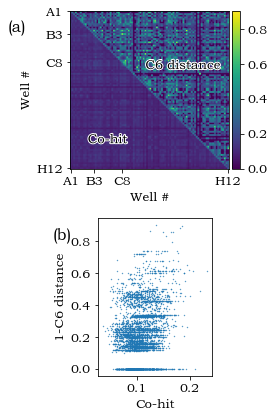

In [17]:
def plot_cohits(screen_name):

    cohits, c6scores, hitcounts, trials = np.load(f"generated/cohits/{screen_name}.npy", allow_pickle=True)

    # cohits = hitcounts / trials

    tri_idx = np.triu_indices(cohits.shape[0], k=1)
    x = cohits[tri_idx].ravel()
    y = 1-c6scores[tri_idx].ravel()
    notnanidx = ((np.isnan(x) | np.isnan(y)) == False) # & (y!=1)
    x = x[notnanidx]
    y = y[notnanidx]
    # x = np.log(x)
    # y = np.log(y)
    mx = np.mean(x)
    my = np.mean(y)
    r = np.sum((x-mx)*(y-my)) / np.sqrt(np.sum((x-mx)**2) * np.sum((y-my)**2))
    print(f"correlation coefficient = {r}")

    font = {'family' : 'Bookman Old Style',
        'weight' : 'normal',
        'size'   : 13}
    plt.rc('font', **font)

    # plt.figure(figsize=(15,5))
    # plt.subplot(1, 3, 1)
    # plt.imshow(cohits)
    # # plt.colorbar()
    # plt.title(f"Co-hit")
    # plt.xlabel("Well #")
    # plt.ylabel("Well #")

    plot_data = cohits.T
    plot_data[tri_idx] = 1-c6scores[tri_idx]
    
    
    # plt.subplot(1, 2, 1)
    fig, axs = plt.subplots(2, 1, figsize=(5, 6))
    im = axs[0].imshow(plot_data)
    # plt.colorbar()
    # plt.title(f"C6 distance")
    t = axs[0].text(45, 35, "C6 distance", c='black', fontsize='medium')
    t.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    # t.set_bbox(dict(facecolor='black', alpha=0.5, edgecolor=None))
    t = axs[0].text(10, 80, "Co-hit", c='black', fontsize='medium')
    t.set_path_effects([PathEffects.withStroke(linewidth=2, foreground='w')])
    # t.set_bbox(dict(facecolor='red', alpha=0.2, edgecolor='red'))
    axs[0].set_xlabel("Well #")
    axs[0].set_ylabel("Well #")
    axs[0].set_xticks([0, 14, 31, 95])
    axs[0].set_xticklabels(['A1', 'B3', 'C8', 'H12'])
    axs[0].set_yticks([0, 14, 31, 95])
    axs[0].set_yticklabels(['A1', 'B3', 'C8', 'H12'])
    # axs[0].figure.colorbar(im, ax=axs[0], )
    
    divider = make_axes_locatable(axs[0])
    cax = divider.append_axes("right", size="5%", pad=0.05)

    plt.colorbar(im, cax=cax)
    
    axs[0].set_aspect(1)

    # plt.subplot(1, 2, 2)
    axs[1].scatter(x, y, marker='.', s=0.5)
    axs[1].set_xlabel("Co-hit")
    axs[1].set_ylabel("1-C6 distance")
    axs[1].set_aspect(.3)

    # plt.suptitle("Shotgun I Co-hits vs C6 distance", y=0.82)
    axs[0].set_title('(a)', loc='left', pad=10, x=-0.4, y=0.8)
    # axs[0].text(-40, 5, '(a)')
    # axs[1].set_title('(b)', loc='left', pad=10)
    axs[1].set_title('(b)', loc='left', pad=10, x=-0.4, y=0.8)
    fig.tight_layout()

    return axs

axs = plot_cohits('Shotgun')
ax = axs[1]
rect = patches.Rectangle((0.329, 0.35), 0.035, 0.55, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.savefig('generated/cohits/cohitsshotgun.pdf', dpi=600)

correlation coefficient = 0.3153376516634213


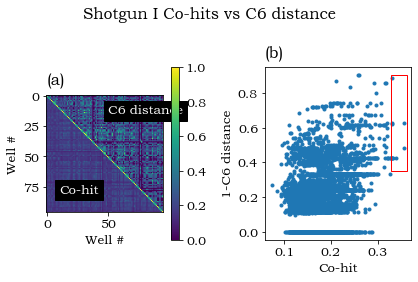

In [8]:

axs = plot_cohits('Shotgun')
ax = axs[1]
rect = patches.Rectangle((0.329, 0.35), 0.035, 0.55, linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)
plt.savefig('generated/cohits/cohitsshotgun.pdf', dpi=90)

In [172]:
def calc_corr_coeff(cohits, c6scores, n, m):
    tri_idx = np.triu_indices(cohits.shape[0], k=1)
    x = cohits[tri_idx].ravel()**n
    y = (1-c6scores[tri_idx].ravel())**m
    notnanidx = ((np.isnan(x) | np.isnan(y)) == False) # & (x!=0) & (x!=1) & (y!=0) & (y!=1)
    x = x[notnanidx]
    y = y[notnanidx]
    mx = np.mean(x)
    my = np.mean(y)
    return np.sum((x-mx)*(y-my)) / np.sqrt(np.sum((x-mx)**2) * np.sum((y-my)**2))

cohits, c6scores = np.load(f"generated/cohits/Shotgun.npy", allow_pickle=True)
n = np.linspace(0, 2)
m = np.linspace(0, 5)
r = np.zeros((len(n), len(m)))
for i in range(len(n)):
    for j in range(len(m)):
        r[i,j] = calc_corr_coeff(cohits, c6scores, n[i], m[j])
np.max(np.nan_to_num(r, 0))

<ipython-input-172-77fad9b3fa65>:10: RuntimeWarning: invalid value encountered in double_scalars
  return np.sum((x-mx)*(y-my)) / np.sqrt(np.sum((x-mx)**2) * np.sum((y-my)**2))


0.3455083033854772

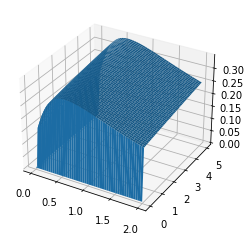

In [173]:
nn, mm = np.meshgrid(n, m)
fig = plt.figure()
ax = fig.add_subplot(projection='3d')
ax.plot_surface(nn, mm, r)
plt.show()

0.34541964961140104